#使用Scikit-Learn建立決策樹分類模型

###載入常用套件


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###載入資料集
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [45]:
#from google.colab import files
#uploads = files.upload()
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [48]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [49]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [50]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###分割資料集
The code below puts 75% of the data into a training set and 25% of the data into a test set.

In [51]:
df = df.copy()
columns = 'price_range'
columns1 = df.iloc[:,:20]
X = df.drop(columns, axis=1)
Y = df.drop(columns1, axis=1)

In [52]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [53]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [56]:
len(X_test)

600

###建構模型

In [57]:
#載入決策樹模型套件
from sklearn.tree import DecisionTreeClassifier

In [58]:
#建立空的決策樹分類器
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

#用訓練資料訓練模型
clf.fit(X_train, Y_train)

#用測試資料預測模型分類，印出結果
clf.predict(X_test)

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 2, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3,
       3, 0, 0, 2, 2, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 3, 0, 3, 1, 1, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       1, 0, 3, 3, 3, 1, 1, 2, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 2, 2, 1, 3, 1, 1, 0, 3, 3, 0, 3, 2, 0, 1, 0, 3,
       3, 2, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 3,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 3, 0, 3, 0, 1,

##顯示結果與畫圖

scikit-learn 21.0版本(大約2019年5月), 決策樹模型可以利用matplotlib畫決策樹分類圖，使用scikit-learn的指令，tree.plot_tree.

In [59]:
#顯示測試資料的正確率
clf.score(X_test, Y_test)

0.7483333333333333

In [60]:
from sklearn.metrics import accuracy_score
y_predict = clf.predict(X_test)
accuracy_score(Y_test, y_predict)

0.7483333333333333

In [61]:
from sklearn import tree

[Text(0.5, 0.875, 'X[13] <= 2235.5\ngini = 0.75\nsamples = 1400\nvalue = [349, 365, 349, 337]'),
 Text(0.25, 0.625, 'X[13] <= 1175.5\ngini = 0.583\nsamples = 745\nvalue = [349, 323, 73, 0]'),
 Text(0.125, 0.375, 'X[11] <= 1449.0\ngini = 0.239\nsamples = 339\nvalue = [292, 47, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.181\nsamples = 319\nvalue = [287, 32, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 20\nvalue = [5, 15, 0, 0]'),
 Text(0.375, 0.375, 'X[0] <= 1071.0\ngini = 0.486\nsamples = 406\nvalue = [57, 276, 73, 0]'),
 Text(0.3125, 0.125, 'gini = 0.491\nsamples = 157\nvalue = [54, 98, 5, 0]'),
 Text(0.4375, 0.125, 'gini = 0.414\nsamples = 249\nvalue = [3, 178, 68, 0]'),
 Text(0.75, 0.625, 'X[13] <= 3140.0\ngini = 0.554\nsamples = 655\nvalue = [0, 42, 276, 337]'),
 Text(0.625, 0.375, 'X[11] <= 1295.0\ngini = 0.48\nsamples = 347\nvalue = [0, 42, 237, 68]'),
 Text(0.5625, 0.125, 'gini = 0.439\nsamples = 310\nvalue = [0, 42, 224, 44]'),
 Text(0.6875, 0.125, 'gini = 0.456\nsamples 

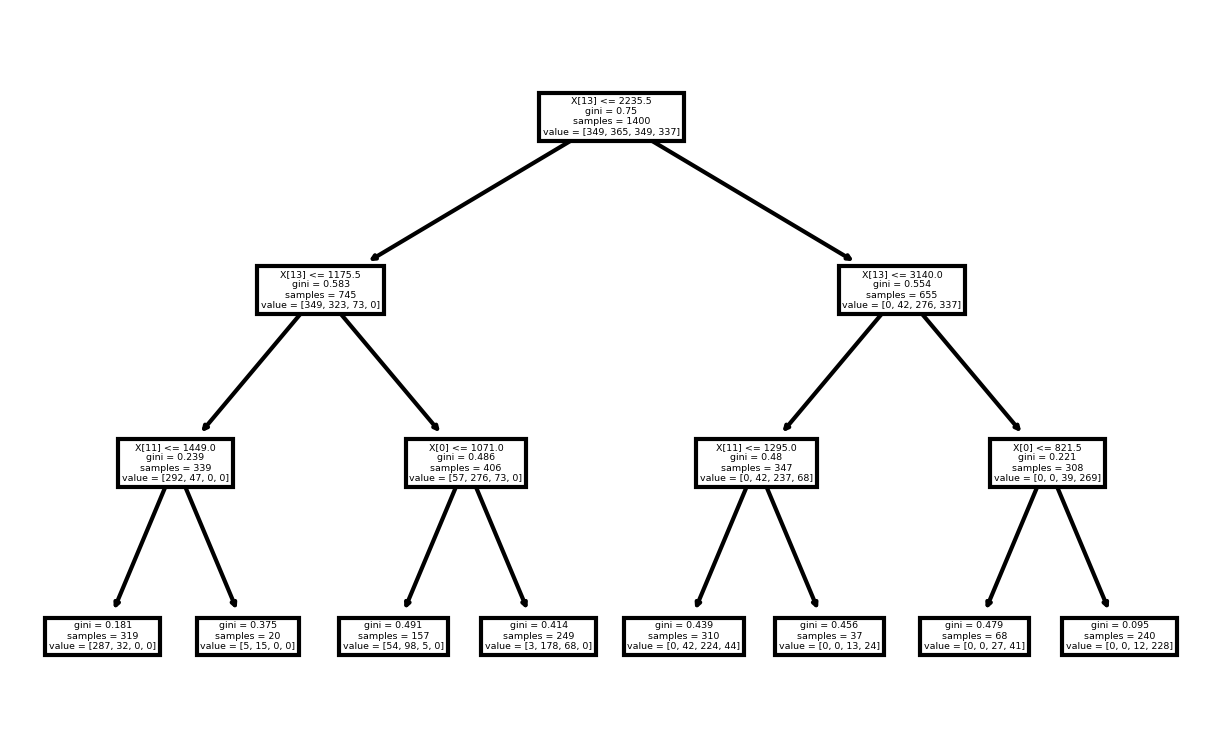

In [62]:
plt.figure(figsize=(5,3), dpi=300)
tree.plot_tree(clf, max_depth=3)

####可以在決策樹分類圖形上加上標籤

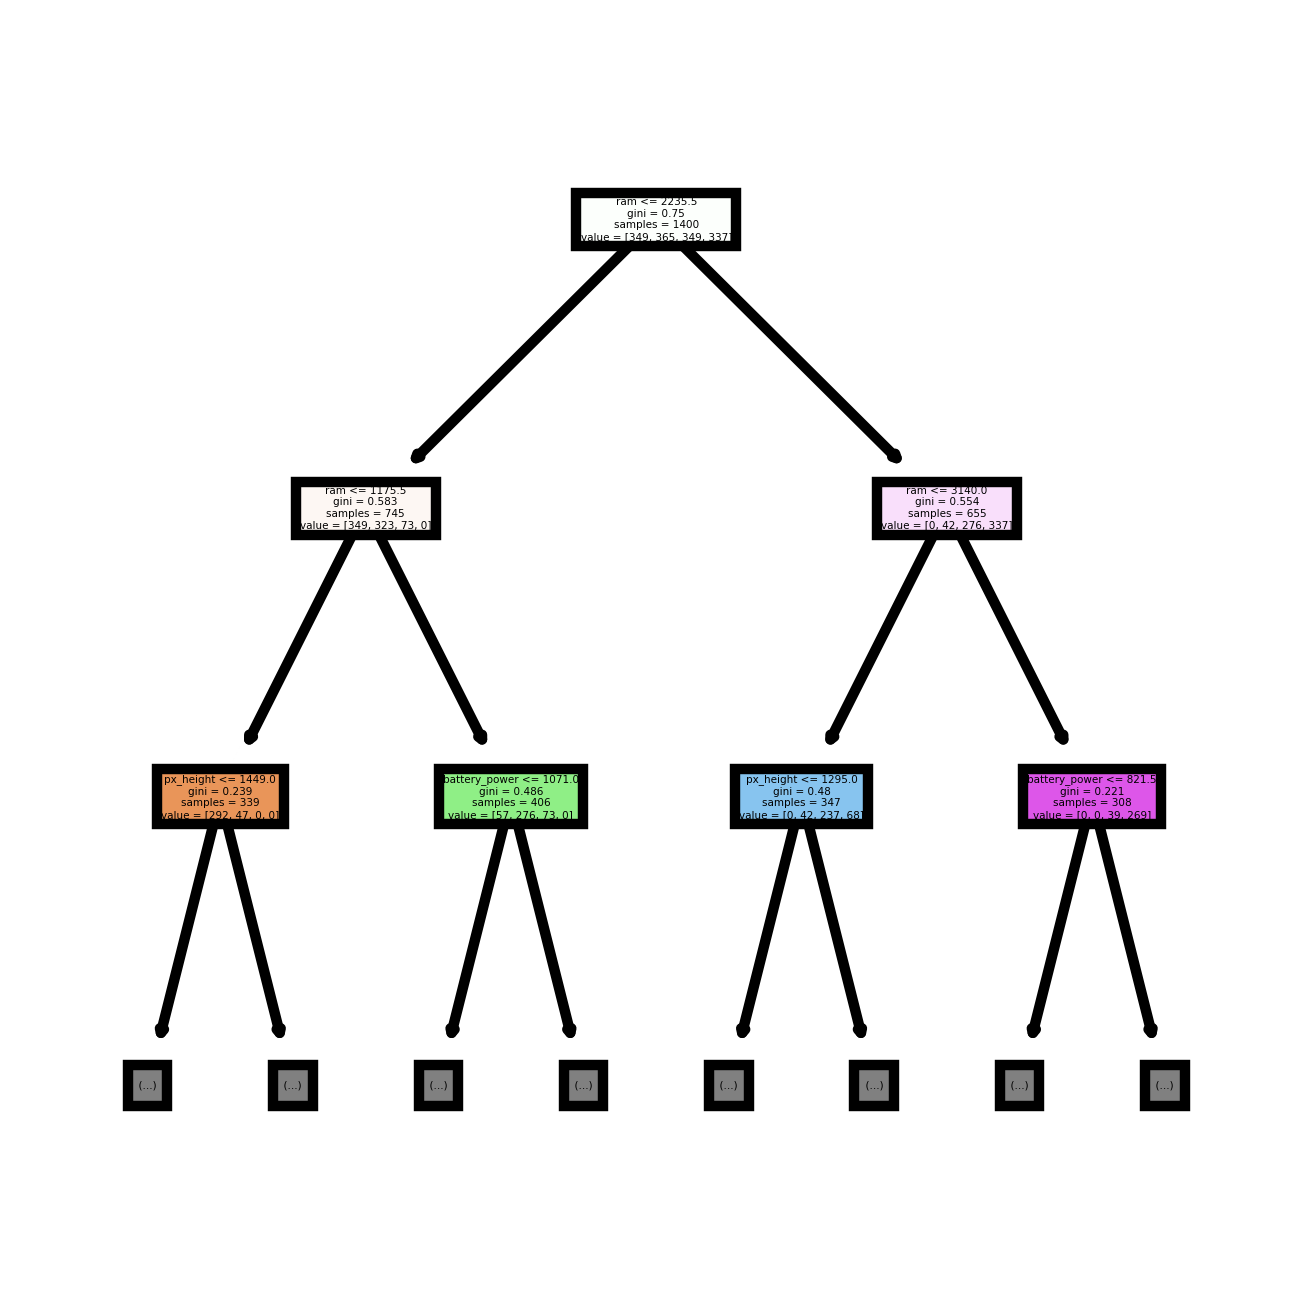

In [63]:
fn=df.columns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (2,2), dpi=750) #建立多個子圖表
tree.plot_tree(clf, max_depth=2, feature_names=fn, filled=True)
fig.savefig('imagename1.png')

NameError: name 'cn' is not defined

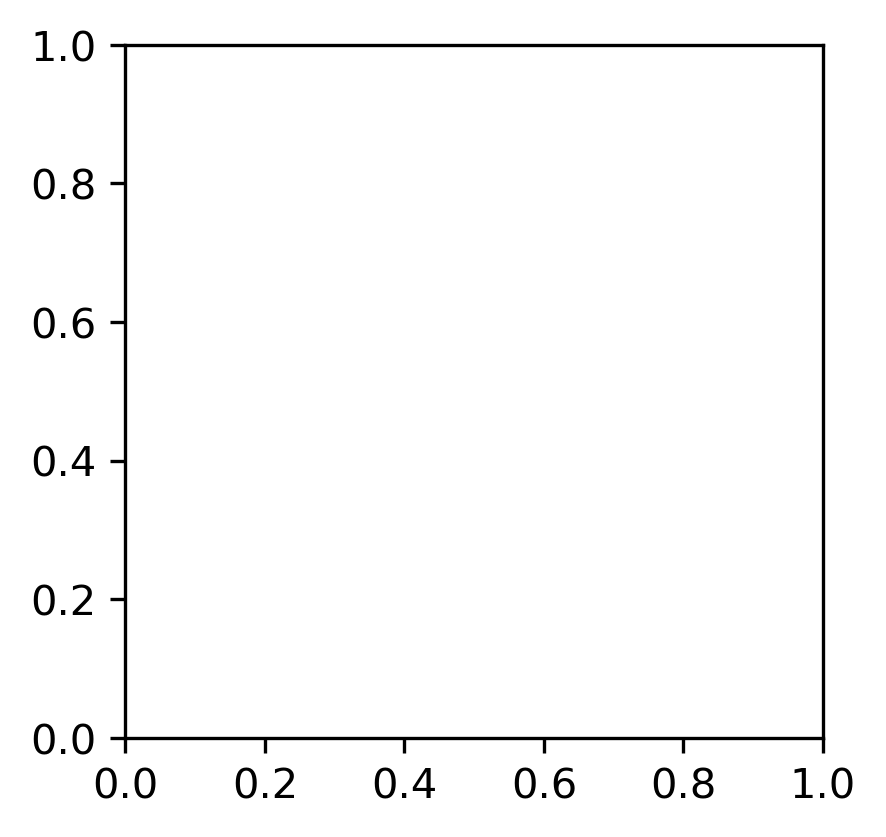

In [64]:
fn=df.columns #擷取特徵名稱
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300) #建立多個子圖表
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True)
fig.savefig('imagename.png')

##重要特徵

In [ ]:
#印出重要特徵的分數

print(fn)
print(clf.feature_importances_)

In [ ]:
import seaborn as sns

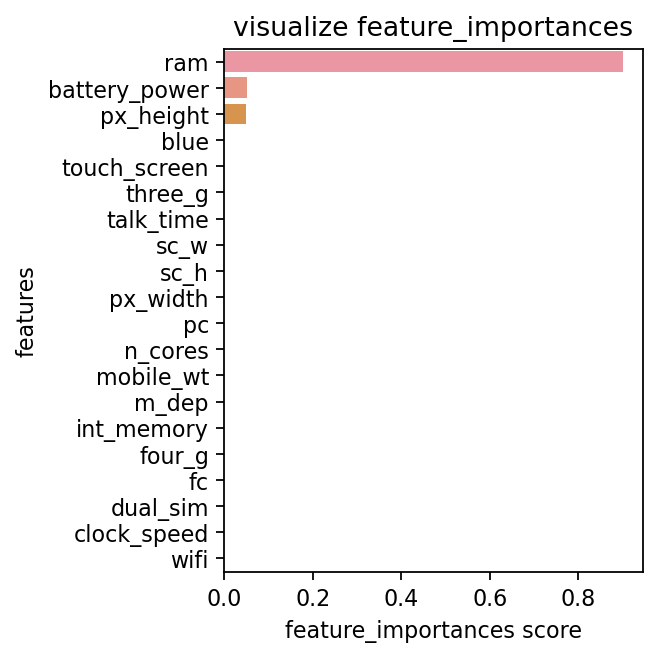

In [62]:
#畫重要特徵圖

fn1=X.columns  #擷取特徵名稱
feature_imp = pd.Series(clf.feature_importances_, index=fn1).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=160, constrained_layout=True)  #調整圖形大小
fig = sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.savefig("feature_importances.png")
# Add labels to your graph
plt.xlabel('feature_importances score')
plt.ylabel('features')
plt.title("visualize feature_importances")
plt.show()

##按價格區間將客戶分類

In [ ]:
df_test1 = df_test.iloc[:,1:21]  #選取檔案後20個欄位資料，客戶的消費特徵(第1個欄位是id)

In [ ]:
#預測客戶分類，輸出檔案
predictions = clf.predict(df_test1)
output = pd.DataFrame({'Customer_Id': df_test.id, 'Price_Range': predictions})
output.to_csv('price_range.csv', index=False)